# Dispersion of perp cyclotron waves with cold ring

In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
from matplotlib import rcParams
# import pyvista as pv

plt.style.use('dark_background')

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

%matplotlib inline

### Dispersion function for cold ring is (Tataronis and crawford)
$\epsilon(\omega, k) = 1 - \Big(\frac{\omega_p}{\omega_c}\Big)^2\frac{\omega\pi}{\sin(\omega\pi)}\frac{\partial}{\partial \mu}(J_\omega(\mu)J_{-\omega}(\mu)) = 0$
and we can represent the derivative of the complex-order Bessels as the trig-integral
$\partial_\mu(J_\omega(\mu)J_{-\omega}(\mu)) = \frac{-1}{\omega\pi}\int_0^{\pi}J_0(2\mu\cos(\theta))\sin(\theta)\sin(2\omega\theta)d\theta$ which can be done by quadrature

In [2]:
# Will use 50-pt gauss-legendre quadrature method with vectorized evaluation
quad_arr = np.array([[1, -0.9988664044200710501855,  0.002908622553155140958],
    [2,   -0.994031969432090712585,    0.0067597991957454015028],
    [3,   -0.985354084048005882309,   0.0105905483836509692636],
    [4,   -0.9728643851066920737133,   0.0143808227614855744194],
    [5,   -0.9566109552428079429978,   0.0181155607134893903513],
    [6,   -0.9366566189448779337809,   0.0217802431701247929816],
    [7,   -0.9130785566557918930897,   0.02536067357001239044],
    [8,   -0.8859679795236130486375,   0.0288429935805351980299],
    [9,   -0.8554297694299460846114,   0.0322137282235780166482],
    [10,  -0.821582070859335948356,    0.0354598356151461541607],
    [11,  -0.784555832900399263905,    0.0385687566125876752448],
    [12,  -0.744494302226068538261,    0.041528463090147697422],
    [13,  -0.70155246870682225109,    0.044327504338803275492],
    [14,  -0.6558964656854393607816,   0.0469550513039484329656],
    [15,  -0.6077029271849502391804,   0.0494009384494663149212],
    [16,  -0.5571583045146500543155,   0.0516557030695811384899],
    [17,  -0.5044581449074642016515,   0.0537106218889962465235],
    [18,  -0.449806334974038789147,   0.05555774480621251762357],
    [19,  -0.3934143118975651273942,   0.057189925647728383723],
    [20,  -0.335500245419437356837,    0.058600849813222445835],
    [21,  -0.2762881937795319903276,   0.05978505870426545751],
    [22,  -0.2160072368760417568473,   0.0607379708417702160318],
    [23,  -0.1548905899981459020716,   0.06145589959031666375641],
    [24,  -0.0931747015600861408545,   0.0619360674206832433841],
    [25,  -0.0310983383271888761123,   0.062176616655347262321],
    [26,  0.0310983383271888761123,    0.062176616655347262321],
    [27,  0.09317470156008614085445,   0.0619360674206832433841],
    [28,  0.154890589998145902072,    0.0614558995903166637564],
    [29,  0.2160072368760417568473,    0.0607379708417702160318],
    [30,  0.2762881937795319903276,    0.05978505870426545751],
    [31,  0.335500245419437356837,    0.058600849813222445835],
    [32,  0.3934143118975651273942,    0.057189925647728383723],
    [33,  0.4498063349740387891471,    0.055557744806212517624],
    [34,  0.5044581449074642016515,    0.0537106218889962465235],
    [35,  0.5571583045146500543155,    0.05165570306958113849],
    [36,  0.60770292718495023918,     0.049400938449466314921],
    [37,  0.6558964656854393607816,    0.046955051303948432966],
    [38,  0.7015524687068222510896,    0.044327504338803275492],
    [39,  0.7444943022260685382605,    0.0415284630901476974224],
    [40,  0.7845558329003992639053,    0.0385687566125876752448],
    [41,  0.8215820708593359483563,    0.0354598356151461541607],
    [42,  0.8554297694299460846114,    0.0322137282235780166482],
    [43,  0.8859679795236130486375,    0.02884299358053519803],
    [44,  0.9130785566557918930897,    0.02536067357001239044],
    [45,  0.9366566189448779337809,    0.0217802431701247929816],
    [46,  0.9566109552428079429978,    0.0181155607134893903513],
    [47,  0.9728643851066920737133,    0.0143808227614855744194],
    [48,  0.985354084048005882309,    0.010590548383650969264],
    [49,  0.9940319694320907125851,    0.0067597991957454015028],
    [50,  0.9988664044200710501855,    0.0029086225531551409584]])

In [3]:
# Define integrand
def integrand(x, om, mu):
    # affine transformation to prepare quad method [-1,1] -> [0, pi]
    theta = 0.5 * np.pi * (1.0 + x)
    # build integrand, z = 2 * mu * cos(theta), shape (quad points, k, real om, imag om)
    z = np.tensordot(2.0 * np.tensordot(np.cos(0.5 * theta), mu, axes=0),
                     np.ones_like(om), axes=0)
    # compute J0(z)
    J0 = sp.jv(0,z)
    # compute product theta * frequency
    t_f = np.tensordot(theta, om, axes=0)
    # compute product sin(theta) * sin(theta * frequency)
    sine_t_f = np.multiply(np.sin(theta)[:, None, None], np.sin(t_f))
    # return the integrand evaluated on the quadrature points
    return np.multiply(sine_t_f[:, None, :, :], J0)

# make grids for plotting
k = np.linspace(0, 7.0, num=75) # np.linspace(6, 7.0, num=75)
om_r = np.linspace(-1.0e-3, 5.0, num=75) # np.linspace(3.2, 3.4, num=75) 
om_i = np.linspace(0.0, 0.35, num=75) # np.linspace(0.19, 0.2, num=75) # 
om = ( np.tensordot(om_r, np.ones_like(om_i), axes=0) + 
      1.0j*np.tensordot(np.ones_like(om_r), om_i, axes=0) )

# evaluate function
a = np.sqrt(10)  # plasma-cyclotron frequency ratio
int_on_quads = integrand(x=quad_arr[:, 1], om=om, mu=k)
# do quadrature integral as inner product
f1 = 0.5 * np.pi # scaling for quadrature integration [0, pi] -> [-1, 1]
result = f1 * np.tensordot(quad_arr[:, 2], int_on_quads, axes=([0], [0]))
# evaluate dispersion function, multiply by singular terms for better behaved function
D = np.sin(np.pi * om[None, :, :]) + (a ** 2.0) * result
print(D.shape)

(75, 75, 75)


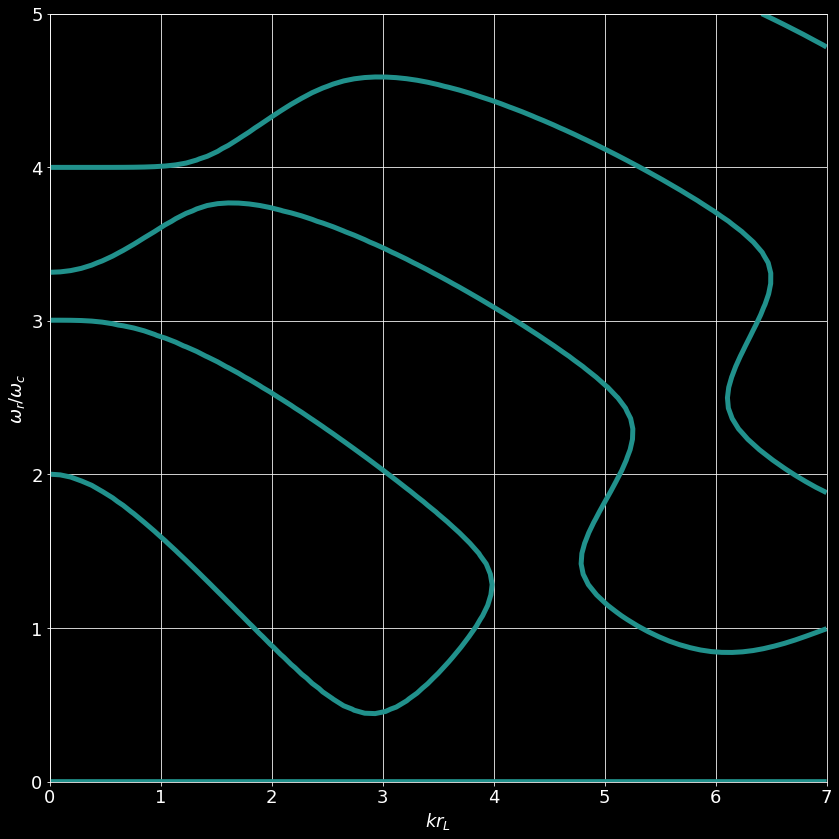

In [4]:
# 2-grids for plotting
K = np.tensordot(k, np.ones_like(om_r), axes=0)
F = np.tensordot(np.ones_like(k), om_r, axes=0)

OR = np.tensordot(om_r, np.ones_like(om_i), axes=0)
OI = np.tensordot(np.ones_like(om_r), om_i, axes=0)

plt.close('all')

# Real dispersion:
plt.figure()
plt.contour(K, F, np.real(D[:, :, 0]), 0, linewidths=5)
plt.grid(True)
plt.xlabel(r'$kr_L$')
plt.ylabel(r'$\omega_r/\omega_c$')
plt.tight_layout()

# To get growth rate:
# plt.figure()
# k_idx = 32
# plt.contour(OR, OI, np.real(D[k_idx, :, :]), 0, linewidths=5, colors='r')
# plt.contour(OR, OI, np.imag(D[k_idx, :, :]), 0, linewidths=5, colors='g')
# plt.grid(True)
# plt.xlabel(r'$omega_r/omega_c$')
# plt.ylabel(r'$\omega_i/\omega_c$')
# plt.tight_layout()

plt.show()

# 3d grids as repeated outer product of vectors
def grid3d(arr0, arr1, arr2):
    return np.tensordot(arr0, np.tensordot(arr1, arr2, axes=0), axes=0)


# 3 grids
# x3 = grid3d(k, np.ones_like(om_r), np.ones_like(om_i))
# y3 = grid3d(np.ones_like(k), om_r, np.ones_like(om_i))
# z3 = grid3d(np.ones_like(k), np.ones_like(om_r), om_i)

# grid = pv.StructuredGrid(x3, y3, z3)
# # set grid data as flattened scalar data (grid data is always flat)
# grid['data'] = np.real(D).transpose().flatten()
# contour0 = grid.contour([0])
# grid['data'] = np.imag(D).transpose().flatten()
# contour1 = grid.contour([0])

# p = pv.PlotterITK()
# # add mesh to the interactive plotter 
# p.add_mesh(contour0)
# p.add_mesh(contour1)
# p.show()